In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

In [5]:
# Load real estate stock data from a .parquet file
real_estate_data = pd.read_parquet('/content/dataset.parquet')
real_estate_data = real_estate_data.head(2000)
print(real_estate_data.head())

   VOLUME       VW     OPEN    CLOSE    HIGHT      LOW              t  \
0     101  15.9531  15.9531  15.9531  15.9531  15.9531  1586283720000   
1     642  15.9981  16.0000  15.9950  16.0000  15.9950  1586283840000   
2     200  16.0150  16.0150  16.0150  16.0150  16.0150  1586283900000   
3     200  16.0393  16.0400  16.0400  16.0400  16.0400  1586284020000   
4     130  16.0582  16.0606  16.0606  16.0606  16.0606  1586284080000   

   TRANSACTIONS   a  op                DATE  
0             2 NaN NaN 2020-04-07 18:22:00  
1             3 NaN NaN 2020-04-07 18:24:00  
2             1 NaN NaN 2020-04-07 18:25:00  
3             2 NaN NaN 2020-04-07 18:27:00  
4             3 NaN NaN 2020-04-07 18:28:00  


In [6]:
# Select relevant features for clustering
features = ['VOLUME', 'VW', 'OPEN', 'CLOSE', 'HIGHT', 'LOW', 'TRANSACTIONS', 'DATE']

# Convert datetime column to timestamp in seconds
real_estate_data['DATE'] = (real_estate_data['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Subset the DataFrame with selected features
df_real_estate = real_estate_data[features]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

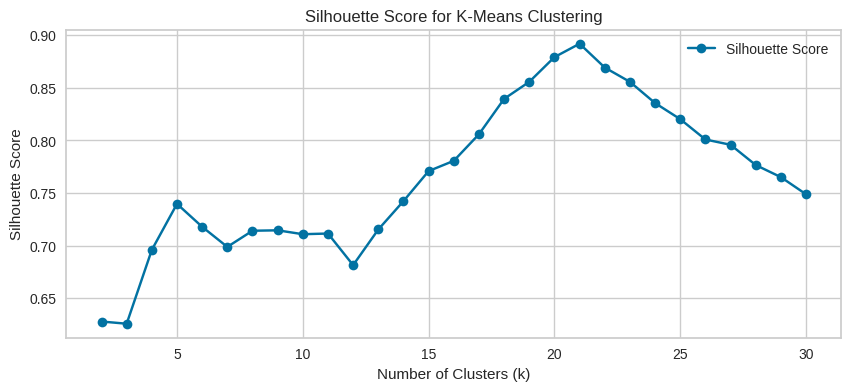

In [10]:
# Silhouette Score for K means
k_values = range(2, 31)
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_real_estate)
    silhouette_scores.append(silhouette_score(df_real_estate, labels))

plt.figure(figsize=(10, 4))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend(loc='best')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

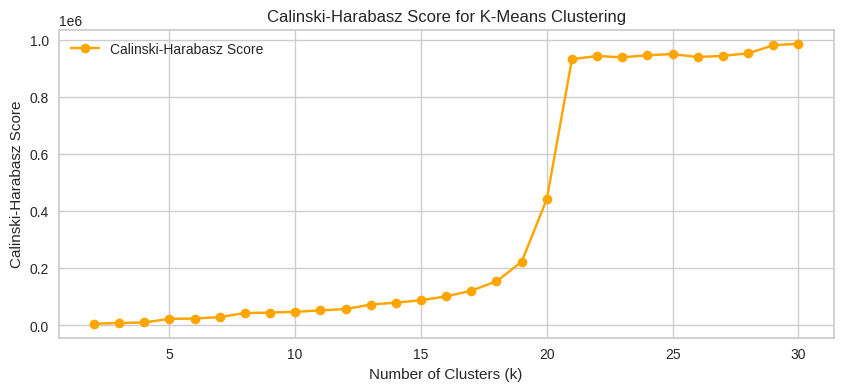

In [11]:
# Calinski Harabasz Score for K means
calinski_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_real_estate)
    calinski_scores.append(calinski_harabasz_score(df_real_estate, labels))

plt.figure(figsize=(10, 4))
plt.plot(k_values, calinski_scores, marker='o', color='orange', label='Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.legend(loc='best')




In [12]:
# Gap Statistics for K means
def calculate_gap_statistic(data, labels, k):
    # Generate random data for comparison
    random_data = np.random.rand(*data.shape)
    random_labels = KMeans(n_clusters=k, random_state=42).fit_predict(random_data)

    # Calculate within-cluster dispersion for both real and random data
    real_dispersion = np.sum(
        np.min(pairwise_distances(data, model.cluster_centers_, metric='euclidean'), axis=1)) / len(data)
    random_dispersion = np.sum(
        np.min(pairwise_distances(random_data, model.cluster_centers_, metric='euclidean'), axis=1)) / len(random_data)

    return np.log(random_dispersion) - np.log(real_dispersion)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

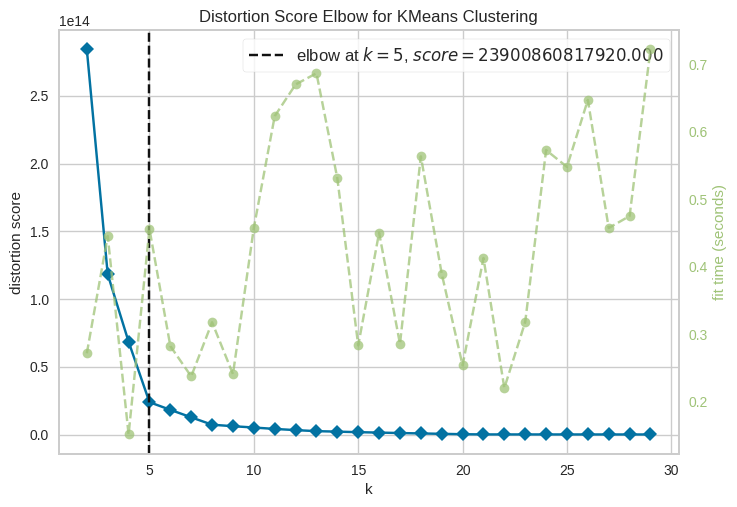

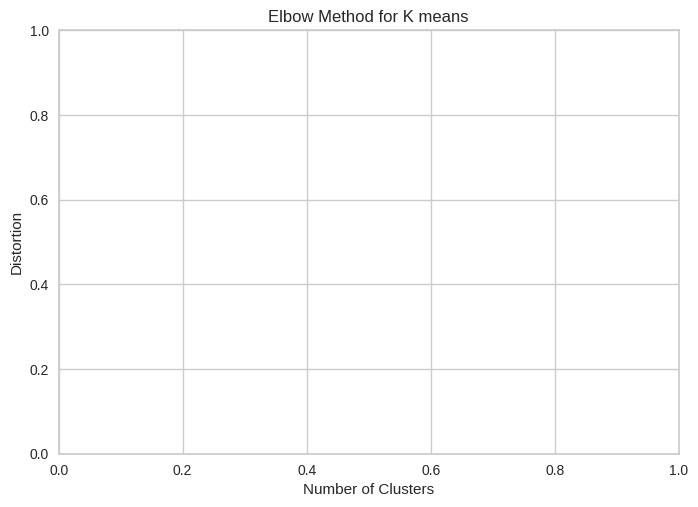

In [13]:
# Elbow Method for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 30))
visualizer.fit(df_real_estate)
visualizer.show()
plt.title("Elbow Method for K means")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.legend(loc='best')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

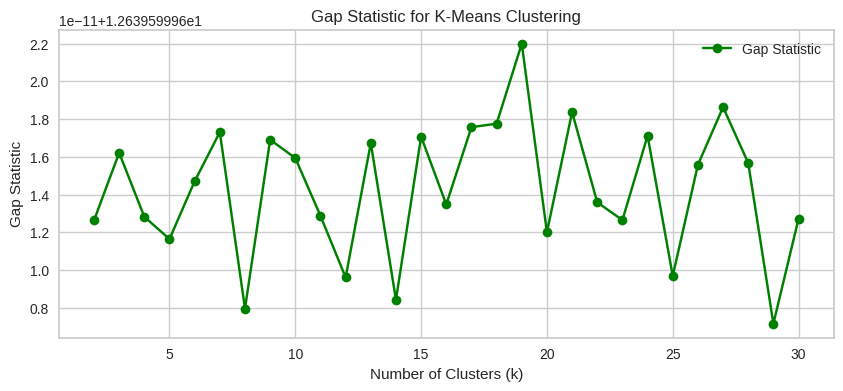

In [14]:
# Use the same k_values for Gap Statistics
gap_scores = [calculate_gap_statistic(df_real_estate, labels, k) for k in k_values]

plt.figure(figsize=(10, 4))
plt.plot(k_values, gap_scores, marker='o', color='green', label='Gap Statistic')
plt.title('Gap Statistic for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.legend(loc='best')

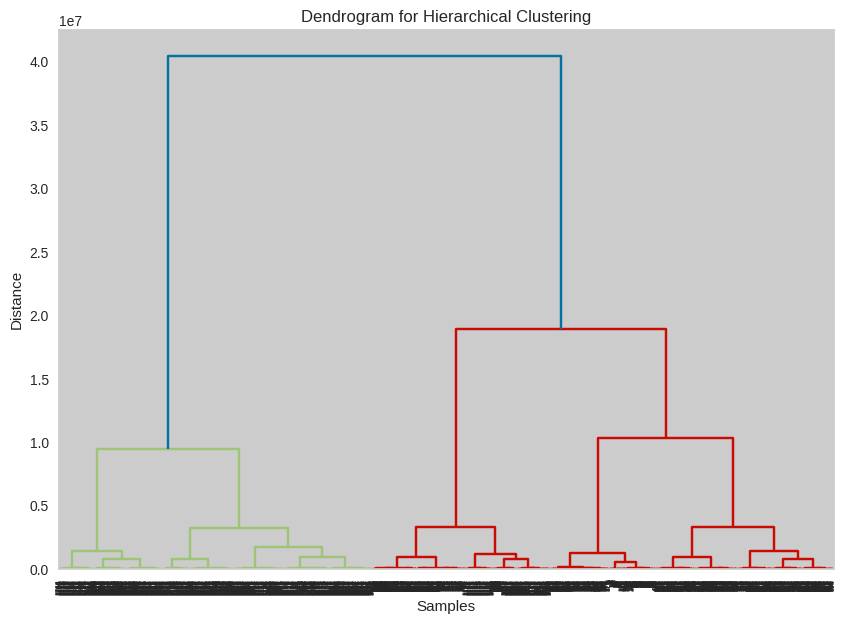

In [9]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(df_real_estate, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.legend(loc='best')

# Show the plots
plt.show()